# EDA of Data from Amazon.com

#### This dataset contains information about reviews given by customers on Amazon Alexa



#### The columns in the given dataset are as follows:

##### rating

##### date

##### variation

##### verified_reviews

##### feedback

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
import re

In [2]:
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

%matplotlib inline

# Importing Dataset

In [3]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

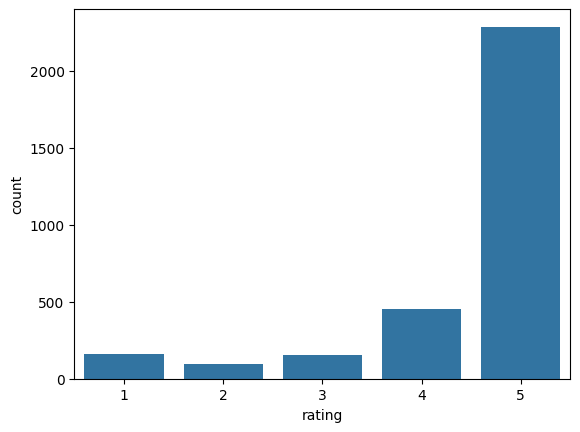

In [6]:
sns.countplot(x='rating', data=df)

In [7]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

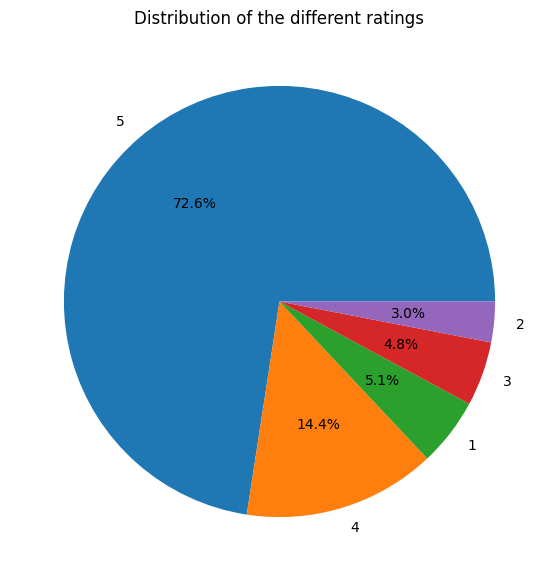

In [8]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different ratings")
plt.show()

<Axes: xlabel='count', ylabel='variation'>

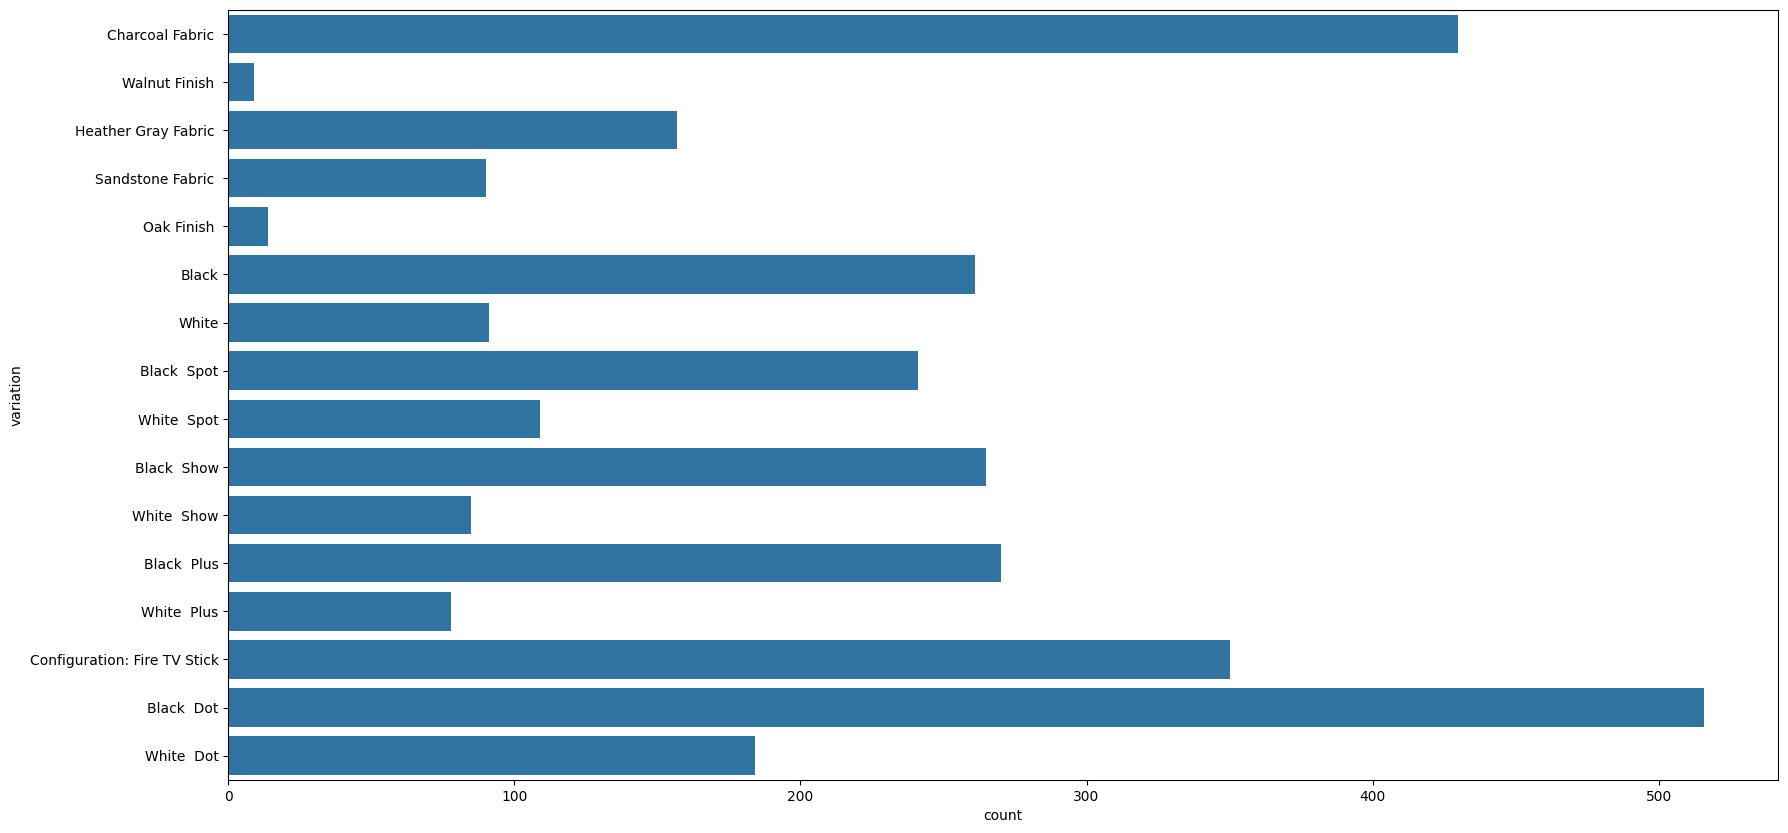

In [9]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='variation', data=df)

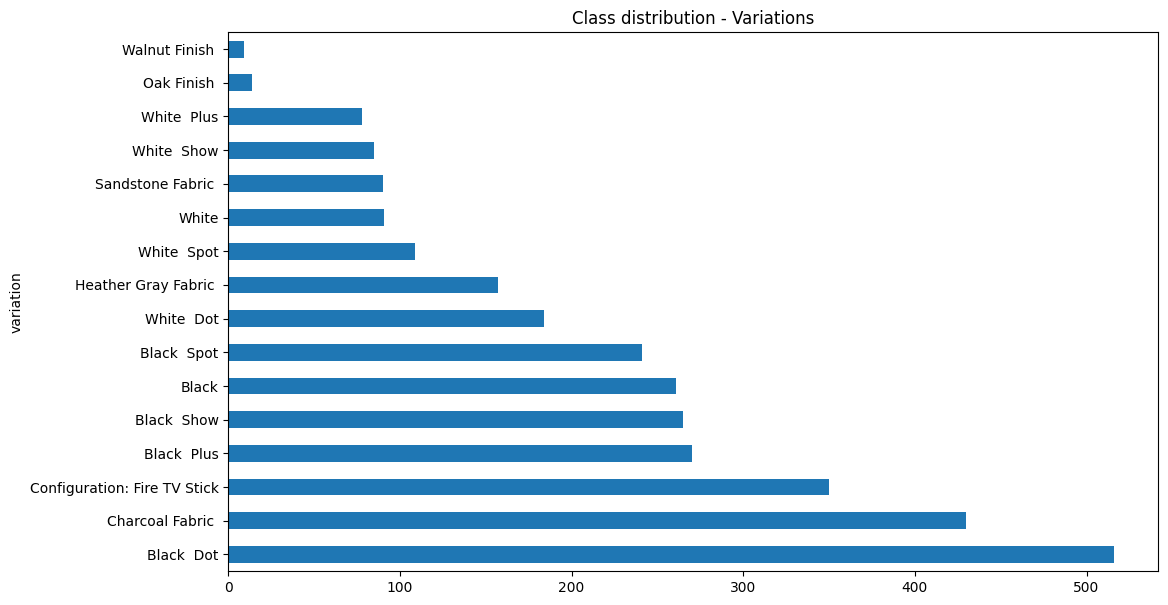

In [10]:
df.variation.value_counts().plot.barh(figsize=(12,7))
plt.title("Class distribution - Variations");

In [11]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [12]:
df[df['variation']=='Black  Dot']['rating'].value_counts()

rating
5    362
4     84
3     34
1     22
2     14
Name: count, dtype: int64

In [13]:
df[df['variation']=='Charcoal Fabric ']['rating'].value_counts()

rating
5    352
4     56
3     10
2      8
1      4
Name: count, dtype: int64

In [14]:
df[df['variation']=='Black  Dot']['feedback'].value_counts()

feedback
1    480
0     36
Name: count, dtype: int64

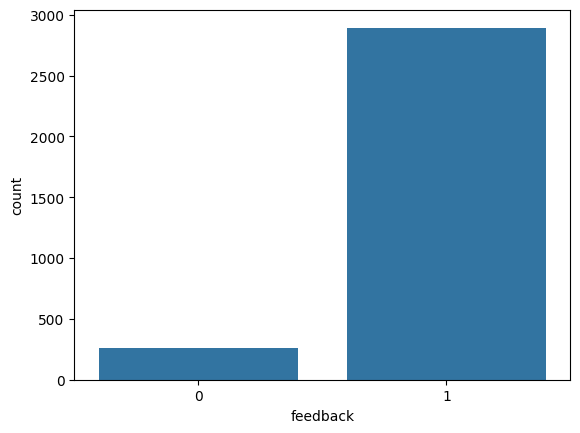

In [15]:
sns.countplot(x='feedback', data=df)
plt.show()

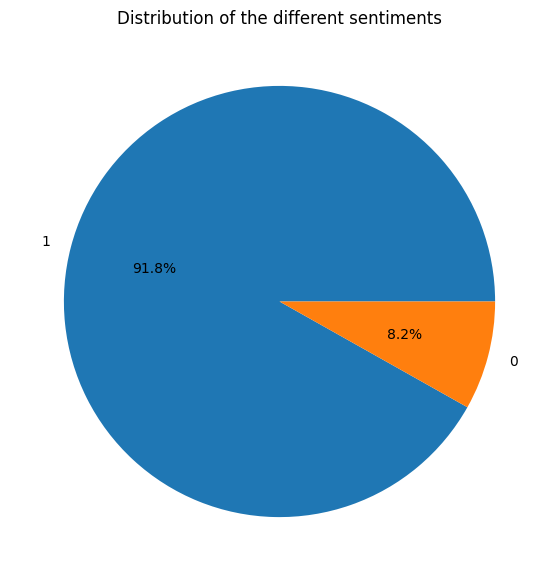

In [16]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [17]:
df['review_length'] = df.verified_reviews.str.len()
df.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13.0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9.0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172.0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5.0


In [18]:
df['review_length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: review_length, dtype: float64

Text(0, 0.5, 'Count')

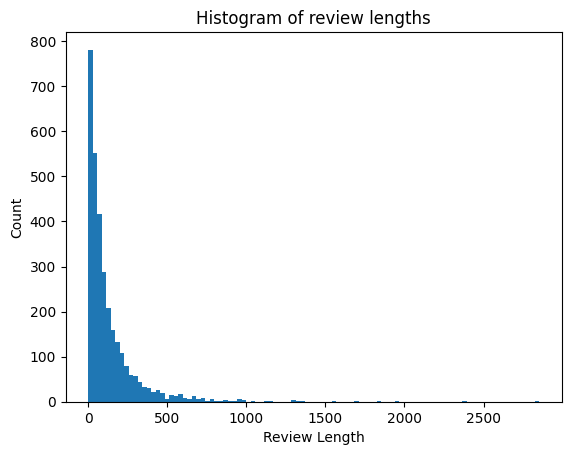

In [19]:
plt.hist(df['review_length'], bins=100)
plt.title("Histogram of review lengths")
plt.xlabel('Review Length')
plt.ylabel('Count')

In [20]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [21]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+https\S+",'', text, flags = re.MULTILINE)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [22]:
df = df.dropna()

In [23]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [24]:
pos_reviews = df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13.0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9.0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172.0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5.0
